# Group Project 1130

## *AirBnb DataSet Problem*

## Goals (3 min)

To understand and work with the AirBnb datasets to solve our business problem 

## Introduction (5 min)

**Business Context.** We are a company looking to expand our ventures based off tourism.

**Business Problem.** The main Task is  **wrangle datasets related to AirBnb and create a critera to figure out the areas to build in**.

**Analytical Context.** Text data is highly unstructured, and often requires pre-processing before we can gather any business insights from it. We will be leveraging tools from **natural language processing (NLP)** in order to help us process this data and generate new features that can be used for analytics or model building.

The case will proceed as follows: 
1. We will extract the files based off what they are
2. We will clean the data 
3. Create bar graph and determine average age in each major zipcode 
4. Same as above but with economic demos 
5. Average Airbnb review per zip code /posyiieve airbnb reviews if they're text
6. Average size of Airbnb per zip code 
7. Average cost of Airbnb per zip code 
8. Airbnb date availability
9. Using all these graphs and our critera we will decide where to build

In [61]:
import nltk # imports the natural language toolkit
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
import numpy  as np
import string
import zipfile
import plotly
import tarfile
import gzip
from nltk.stem import PorterStemmer 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zuhai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zuhai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
# LOADING THE DATASETS
demo = pd.read_csv('demographics.csv')
econ = pd.read_csv('econ_state.csv')
listings = pd.read_csv('listings.csv')

realestate = pd.read_csv('real_estate.csv.gz', compression='gzip')

venues = pd.read_csv('venues.csv.gz', compression='gzip')

zf = zipfile.ZipFile('calendar.csv.zip') 
calendar = pd.read_csv(zf.open('calendar.csv'))
ziplook = pd.read_csv('zipcodesForLookup.csv')
lists = pd.read_csv('listings.csv')

In [63]:
demo.head()

zipcode  5_years_or_less  5-9_years  10-14_years  15-19_years  20-24_years  \
0      601            17982       1006         1080         1342         1352   
1      602            40260       2006         2440         2421         2953   
2      603            52408       2664         3177         3351         3685   
3      606             6331        347          331          461          474   
4      610            28328       1438         1490         2044         2122   

   25-34_years  35-44_years  45-54_years  55-59_years  ...  $10,000-$14,999  \
0         1321         2253         2149         2434  ...             48.1   
1         2865         5124         5139         5947  ...             31.4   
2         3585         6473         6775         6678  ...               31   
3          469          707          933          776  ...             45.3   
4         1985         3358         3778         3858  ...             26.9   

   $15,000-$24,999  $25,000-$34,999  $35,000-$49,999  $50,000-$64,999  \
0               12             12.8              8.6              8.7   
1             16.3             17.9             12.2             10.6   
2             14.9             17.5             11.7             10.8   
3             10.2               20             11.7               11   
4             14.8             23.7             15.2              9.3   

   $65,000-$74,999 $75,000-$99,999 $100,000_or_more median_household_income  \
0              6.2             1.4             16.3                   10816   
1              7.7             2.9             21.2                   16079   
2              8.7             2.4             21.9                   16804   
3              1.8               0             12.8                   12512   
4              7.5             1.6             18.4                   17475   

  mean_household_income  
0                 20349  
1                 23282  
2                 26820  
3                 15730  
4                 23360  

[5 rows x 26 columns]

In [64]:
econ.head()

state  2005Q1_gdp  2005Q2_gdp  2005Q3_gdp  2005Q4_gdp  2006Q1_gdp  \
0    AL      153332      155940      157437      160293      161934   
1    AK       37517       38907       40691       43138       42872   
2    AZ      218206      224496      231629      235099      241787   
3    AR       88446       89264       90515       93050       93413   
4    CA     1722091     1747827     1787427     1809426     1857944   

   2006Q2_gdp  2006Q3_gdp  2006Q4_gdp  2007Q1_gdp  ...  2016/03_ur  \
0      163974      165470      166495      166821  ...         6.6   
1       44653       45349       45840       46658  ...         5.9   
2      244659      250886      256505      258078  ...         4.1   
3       95259       95481       95203       94289  ...         5.5   
4     1865835     1886549     1907754     1915172  ...         5.6   

   2016/04_ur  2016/05_ur  2016/06_ur  2016/07_ur  2016/08_ur  2016/09_ur  \
0         6.6         6.6         6.7         6.7         6.7         6.6   
1         5.8         5.8         5.8         5.8         5.9         6.0   
2         4.1         4.1         4.1         4.0         4.0         4.0   
3         5.4         5.3         5.3         5.2         5.1         5.1   
4         5.5         5.5         5.5         5.4         5.4         5.3   

   2016/10_ur  2016/11_ur  2016/12_ur  
0         6.6         6.6         6.6  
1         6.1         6.2         6.3  
2         4.0         4.0         3.9  
3         5.0         5.0         5.0  
4         5.3         5.3         5.2  

[5 rows x 519 columns]

In [65]:
realestate.head()

type  zipcode      city state     metro    county  size_rank   1996-04  \
0  ZHVI    10025  New York    NY  New York  New York          1       NaN   
1  ZHVI    60657   Chicago    IL   Chicago      Cook          2  146700.0   
2  ZHVI    60614   Chicago    IL   Chicago      Cook          3  198000.0   
3  ZHVI    79936   El Paso    TX   El Paso   El Paso          4   70800.0   
4  ZHVI    60640   Chicago    IL   Chicago      Cook          5  102300.0   

    1996-05   1996-06  ...  2016-09  2016-10  2016-11    2016-12  2017-01  \
0       NaN       NaN  ...  1137500  1137700  1152700  1156000.0  1140200   
1  146500.0  146300.0  ...   318200   318100   318800   320200.0   320800   
2  195500.0  194200.0  ...   401900   406000   414100   417800.0   417400   
3   71000.0   71000.0  ...   113800   113900   114100   114500.0   114900   
4  101300.0  100700.0  ...   198800   199200   200100   201500.0   203000   

   2017-02  2017-03  2017-04  2017-05  2017-06  
0  1130000  1131900  1149600  1198400  1247000  
1   322000   323800   326100   327800   329100  
2   418400   414100   404100   406400   415500  
3   115000   114700   114700   114800   114700  
4   205100   206700   206500   206200   206700  

[5 rows x 262 columns]

In [66]:
calendar.head()

listing_id        date available  price metro_area
0        2515  2018-03-05         t   69.0        NYC
1        2515  2018-03-04         t   69.0        NYC
2        2515  2018-03-03         t   69.0        NYC
3        2515  2018-03-02         t   69.0        NYC
4        2515  2018-03-01         t   69.0        NYC

In [67]:
venues.head()

city                                        id   latitude  \
0  new york city  b1a0d113cb17d1d85f0e12700dd71f36bddedc54  40.601540   
1  new york city  8799bb8d8ac7c2e1933f92ac1ef0f69a5e0b37c1  40.608921   
2  new york city  f2390680116af4d62e0da6f0432d33e94b9cb0e6  40.616978   
3  new york city  e9294eb56025e8eb29b937dc0aca29fd3059b9ab  40.617318   
4  new york city  5c7b72c7bf9e7bc4f94baf09db1252088087f65d  40.618371   

   longitude                   name  rating  \
0 -73.729636  A Bacon Yacht Charter     NaN   
1 -73.728256              Mezzanote     NaN   
2 -73.730349           Prime Bistro     4.0   
3 -73.730637             Rita's Ice     4.6   
4 -73.728178         Cho-Sen Island     4.4   

                                               types  
0  ['restaurant', 'food', 'point_of_interest', 'e...  
1  ['restaurant', 'food', 'point_of_interest', 'e...  
2  ['bar', 'restaurant', 'food', 'point_of_intere...  
3  ['restaurant', 'food', 'point_of_interest', 'e...  
4  ['restaurant', 'food', 'point_of_interest', 'e...

In [68]:
lists.head()

accommodates                                          amenities  \
0           2.0  {"Cable TV","Wireless Internet","Air condition...   
1           4.0  {TV,Internet,"Wireless Internet","Air conditio...   
2           4.0  {TV,"Cable TV",Internet,"Wireless Internet","A...   
3           3.0  {TV,Internet,"Wireless Internet","Air conditio...   
4           4.0  {Internet,"Wireless Internet","Air conditionin...   

   availability_30  bathrooms  bed_type  bedrooms  beds cancellation_policy  \
0               24        1.0  Real Bed       1.0   1.0            moderate   
1               30        1.0  Real Bed       1.0   1.0            flexible   
2               30        3.0  Real Bed       3.0   3.0              strict   
3                8        1.0  Real Bed       1.0   1.0              strict   
4               17        1.0  Real Bed       1.0   1.0            moderate   

               city  has_availability  ...  review_scores_checkin  \
0    sunnysidebronx               NaN  ...                   10.0   
1    sunnysidebronx               NaN  ...                    NaN   
2    sunnysidebronx               NaN  ...                    NaN   
3  long island city               NaN  ...                   10.0   
4    sunnysidebronx               NaN  ...                   10.0   

   review_scores_cleanliness review_scores_communication  \
0                       10.0                        10.0   
1                        NaN                         NaN   
2                        NaN                         NaN   
3                       10.0                        10.0   
4                       10.0                        10.0   

   review_scores_location  review_scores_rating review_scores_value  \
0                    10.0                 100.0                10.0   
1                     NaN                   NaN                 NaN   
2                     NaN                   NaN                 NaN   
3                    10.0                  93.0                10.0   
4                    10.0                  97.0                10.0   

         room_type  state weekly_price  zipcode  
0     Private room     NY          NaN    10464  
1     Private room     NY          NaN    10464  
2  Entire home/apt     NY          NaN    10464  
3  Entire home/apt     NY        775.0    10464  
4     Private room     NY        350.0    10464  

[5 rows x 29 columns]

### Exercise 1: (4 min)

Clean the data for NYC 

In [69]:
lists = pd.read_csv('listings.csv')
lists = lists.drop(['amenities', 'availability_30','bathrooms','bed_type','bedrooms','beds'], axis=1) 
lists = lists.drop(['cancellation_policy', 'has_availability', 'instant_bookable','latitude','longitude'], axis=1) 
lists = lists.drop(['property_type', 'room_type'], axis=1) 
#lists['avg review'] = lists[['review_scores_checkin', 'review_scores_cleanliness','review_scores_communication','review_scores_location','review_scores_rating','review_scores_value']].mean(axis=1)
lists = lists.drop(['review_scores_checkin', 'review_scores_cleanliness','review_scores_communication','review_scores_location','review_scores_value'], axis=1) 
lists = lists[lists.state == 'NY']
lists[lists.columns[~lists.isnull().any()]]
lists = lists[lists.metropolitan == 'NYC']
lists[lists.columns[~lists.isnull().any()]]
lists = lists.drop(['host_id', 'metropolitan','state'], axis=1) 
lists

accommodates              city        id  \
0               2.0    sunnysidebronx   7949480   
1               4.0    sunnysidebronx  16042478   
2               4.0    sunnysidebronx   1886820   
3               3.0  long island city   6627449   
4               4.0    sunnysidebronx   5557381   
...             ...               ...       ...   
40735           2.0           yonkers  18197581   
40736           7.0          new york   3235285   
40737           6.0          new york  18324921   
40738           4.0          new york  18035489   
40739           6.0  long island city  17360085   

                                                    name  price  \
0      City Island Sanctuary relaxing BR & Bath w Par...   99.0   
1                            WATERFRONT STUDIO APARTMENT  200.0   
2                         Quaint City Island Community.   300.0   
3                         Large 1 BDRM in Great location  125.0   
4                                Quaint City Island Home   69.0   
...                                                  ...    ...   
40735                Cozy room with parking lot included   70.0   
40736                Duplex Garden apt off Central Park!  949.0   
40737                Yacht phish shows Madison sq garden  600.0   
40738                In the heart of tourist attractions  129.0   
40739                                 Phish bakers dozen  200.0   

       review_scores_rating  weekly_price zipcode  
0                     100.0           NaN   10464  
1                       NaN           NaN   10464  
2                       NaN           NaN   10464  
3                      93.0         775.0   10464  
4                      97.0         350.0   10464  
...                     ...           ...     ...  
40735                   NaN           NaN   10705  
40736                 100.0        6200.0   10024  
40737                   NaN           NaN   10004  
40738                   NaN           NaN   10029  
40739                   NaN           NaN   10001  

[40737 rows x 8 columns]

In [70]:
# Cleaning venues, only get NYC drops NA values
venuescl = venues[venues.city == 'new york city']
venuescl[venuescl.columns[~venues.isnull().any()]]
venuescl = venuescl.dropna(how='any',axis=0) 
venuescl.head()


city                                        id   latitude  \
2  new york city  f2390680116af4d62e0da6f0432d33e94b9cb0e6  40.616978   
3  new york city  e9294eb56025e8eb29b937dc0aca29fd3059b9ab  40.617318   
4  new york city  5c7b72c7bf9e7bc4f94baf09db1252088087f65d  40.618371   
5  new york city  0b99220b44ee0d45d28f44e95d08da112f6e2ca7  40.618126   
6  new york city  97fdbf124eeb91d70d7c3f710ca52c997d618bb9  40.617592   

   longitude                      name  rating  \
2 -73.730349              Prime Bistro     4.0   
3 -73.730637                Rita's Ice     4.6   
4 -73.728178            Cho-Sen Island     4.4   
5 -73.728679  Sunflower Cafe- Lawrence     4.2   
6 -73.729390      Sushi Tokyo Lawrence     4.0   

                                               types  
2  ['bar', 'restaurant', 'food', 'point_of_intere...  
3  ['restaurant', 'food', 'point_of_interest', 'e...  
4  ['restaurant', 'food', 'point_of_interest', 'e...  
5  ['cafe', 'restaurant', 'food', 'point_of_inter...  
6  ['restaurant', 'food', 'point_of_interest', 'e...

In [71]:
# Cleaning Calender, drops NAS and gets only avaliable airbnbs
calendar_aval = calendar[calendar.available == 't']
calendar_aval[calendar_aval.columns[~calendar_aval.isnull().any()]]
calendar_aval = calendar_aval[calendar_aval.metro_area == 'NYC']
calendar_aval[calendar_aval.columns[~calendar_aval.isnull().any()]]
calendar_aval.head()

listing_id        date available  price metro_area
0        2515  2018-03-05         t   69.0        NYC
1        2515  2018-03-04         t   69.0        NYC
2        2515  2018-03-03         t   69.0        NYC
3        2515  2018-03-02         t   69.0        NYC
4        2515  2018-03-01         t   69.0        NYC

In [72]:
# Cleaning real estate, gets only 2016-08 onwards
realcleaned = realestate.filter(["type","zipcode","city","state","metro","county","size_rank","2016-08","2016-09","2016-10","2016-11","2016-12","2017-01","2017-02","2017-03","2017-04","2017-05","2017-06"], axis=1)
realcleaned = realcleaned[realcleaned.city == 'New York']
realcleaned[realcleaned.columns[~realcleaned.isnull().any()]]
realcleaned.head()

type  zipcode      city state     metro    county  size_rank  2016-08  \
0   ZHVI    10025  New York    NY  New York  New York          1  1132500   
8   ZHVI    11226  New York    NY  New York     Kings          9   572800   
10  ZHVI    10016  New York    NY  New York  New York         11   917000   
17  ZHVI    10128  New York    NY  New York  New York         18  1077000   
23  ZHVI    10462  New York    NY  New York     Bronx         24   118200   

    2016-09  2016-10  2016-11    2016-12  2017-01  2017-02  2017-03  2017-04  \
0   1137500  1137700  1152700  1156000.0  1140200  1130000  1131900  1149600   
8    583600   594800   605200   612100.0   612800   616900   628900   644200   
10   934800   946000   949200   950000.0   951800   960100   972200   986900   
17  1074900  1076400  1090300  1111300.0  1133100  1154700  1189800  1241000   
23   120600   121600   121500   121000.0   121100   123200   126200   128700   

    2017-05  2017-06  
0   1198400  1247000  
8    653500   658700  
10  1021200  1061200  
17  1288200  1318300  
23   131900   135400

In [73]:
#Econ doesnt need cleaning
democlean = demo.filter(["zipcode","20-24_years","25-34_years","35-44_years","35,000","50,000","65,000","75,000","households","$9,999_or_less","$10,000-$14,999","$15,000-$24,999","$25,000-$34,999","$35,000-$49,999","$50,000-$64,999","$65,000-$74,999","$75,000-$99,999","$100,000_or_more","median_household_income","mean_household_income"], axis=1)
democlean = demo.dropna(how='any',axis=0) 
democlean.head()

zipcode  5_years_or_less  5-9_years  10-14_years  15-19_years  20-24_years  \
0      601            17982       1006         1080         1342         1352   
1      602            40260       2006         2440         2421         2953   
2      603            52408       2664         3177         3351         3685   
3      606             6331        347          331          461          474   
4      610            28328       1438         1490         2044         2122   

   25-34_years  35-44_years  45-54_years  55-59_years  ...  $10,000-$14,999  \
0         1321         2253         2149         2434  ...             48.1   
1         2865         5124         5139         5947  ...             31.4   
2         3585         6473         6775         6678  ...               31   
3          469          707          933          776  ...             45.3   
4         1985         3358         3778         3858  ...             26.9   

   $15,000-$24,999  $25,000-$34,999  $35,000-$49,999  $50,000-$64,999  \
0               12             12.8              8.6              8.7   
1             16.3             17.9             12.2             10.6   
2             14.9             17.5             11.7             10.8   
3             10.2               20             11.7               11   
4             14.8             23.7             15.2              9.3   

   $65,000-$74,999 $75,000-$99,999 $100,000_or_more median_household_income  \
0              6.2             1.4             16.3                   10816   
1              7.7             2.9             21.2                   16079   
2              8.7             2.4             21.9                   16804   
3              1.8               0             12.8                   12512   
4              7.5             1.6             18.4                   17475   

  mean_household_income  
0                 20349  
1                 23282  
2                 26820  
3                 15730  
4                 23360  

[5 rows x 26 columns]

### Cleaning data to work with it

Here we work on the data to get it so we can analyze it further by adding zipcodes and doing zipcode lookup

In [74]:
zipdict = ziplook.set_index('Column1').T.to_dict('list')

In [75]:
realcleaned['borough'] = realcleaned['zipcode'].map(zipdict)
realcleaned.head()

type  zipcode      city state     metro    county  size_rank  2016-08  \
0   ZHVI    10025  New York    NY  New York  New York          1  1132500   
8   ZHVI    11226  New York    NY  New York     Kings          9   572800   
10  ZHVI    10016  New York    NY  New York  New York         11   917000   
17  ZHVI    10128  New York    NY  New York  New York         18  1077000   
23  ZHVI    10462  New York    NY  New York     Bronx         24   118200   

    2016-09  2016-10  2016-11    2016-12  2017-01  2017-02  2017-03  2017-04  \
0   1137500  1137700  1152700  1156000.0  1140200  1130000  1131900  1149600   
8    583600   594800   605200   612100.0   612800   616900   628900   644200   
10   934800   946000   949200   950000.0   951800   960100   972200   986900   
17  1074900  1076400  1090300  1111300.0  1133100  1154700  1189800  1241000   
23   120600   121600   121500   121000.0   121100   123200   126200   128700   

    2017-05  2017-06      borough  
0   1198400  1247000  [Manhattan]  
8    653500   658700   [Brooklyn]  
10  1021200  1061200  [Manhattan]  
17  1288200  1318300  [Manhattan]  
23   131900   135400      [Bronx]

In [76]:
# drop city, state, metro, county, size_rank columns
realcleaned  = realcleaned.drop(['city', 'state', 'metro', 'county', 'size_rank'], axis=1) 
#remove square brackets from start and end of borough column
realcleaned['borough'] = realcleaned['borough'].str[0]
realcleaned.head() 

type  zipcode  2016-08  2016-09  2016-10  2016-11    2016-12  2017-01  \
0   ZHVI    10025  1132500  1137500  1137700  1152700  1156000.0  1140200   
8   ZHVI    11226   572800   583600   594800   605200   612100.0   612800   
10  ZHVI    10016   917000   934800   946000   949200   950000.0   951800   
17  ZHVI    10128  1077000  1074900  1076400  1090300  1111300.0  1133100   
23  ZHVI    10462   118200   120600   121600   121500   121000.0   121100   

    2017-02  2017-03  2017-04  2017-05  2017-06    borough  
0   1130000  1131900  1149600  1198400  1247000  Manhattan  
8    616900   628900   644200   653500   658700   Brooklyn  
10   960100   972200   986900  1021200  1061200  Manhattan  
17  1154700  1189800  1241000  1288200  1318300  Manhattan  
23   123200   126200   128700   131900   135400      Bronx

In [77]:
democlean['borough'] = democlean['zipcode'].map(zipdict)
democlean = democlean.dropna(how='any',axis=0) 
democlean['borough'] = democlean['borough'].str[0]
democlean.head()

zipcode  5_years_or_less  5-9_years  10-14_years  15-19_years  \
2558    10001            23537        562         1089          900   
2559    10002            80736       3079         3171         3638   
2560    10003            57112       1545          911          764   
2561    10004             3221        126          101          161   
2562    10005             8131        299          250          140   

      20-24_years  25-34_years  35-44_years  45-54_years  55-59_years  ...  \
2558         1053         2785         4970         3905         2795  ...   
2559         3922         5338        13938        12055        11182  ...   
2560         7308         5714        15565         7843         5718  ...   
2561          227          255          857          572          387  ...   
2562           85         1101         3690         1696          631  ...   

      $15,000-$24,999  $25,000-$34,999  $35,000-$49,999  $50,000-$64,999  \
2558              4.1              9.3              5.1              9.2   
2559             12.6               14              8.8               10   
2560              1.9                7              4.9              6.4   
2561              0.3              1.7              6.5              5.1   
2562              0.8              4.5              1.9              1.4   

      $65,000-$74,999  $75,000-$99,999 $100,000_or_more  \
2558              8.5              9.8             27.5   
2559             14.2              7.1             31.3   
2560               13             11.3             30.7   
2561              7.1             14.8               27   
2562                9              9.9             20.3   

     median_household_income mean_household_income    borough  
2558                   86801                158183  Manhattan  
2559                   33726                 61946  Manhattan  
2560                   98151                161692  Manhattan  
2561                  119691                177262  Manhattan  
2562                  124194                176424  Manhattan  

[5 rows x 27 columns]

In [78]:
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.point import Point
import geopy

def get_zip_code(x):
    geolocator = geopy.Nominatim(user_agent="check_1")
    location = geolocator.reverse("{}, {}".format(x['latitude'],x['longitude']))
    return location.raw['address']['postcode']
venu = venuescl.sort_values(by=['rating'], ascending=False)
venu = venu.head(50)
venu['zipcode'] = venu.apply(lambda x: get_zip_code(x), axis = 1)
venu.head()


city                                        id   latitude  \
48476  new york city  5161e3e3db931a8574e44c063f4ed8647375e8a9  40.669737   
59758  new york city  0bce4e42ae30780b6da1c24edf56a2070a041e7e  40.746251   
59855  new york city  b113763e103d2d45836b1f6c92b8a4d1d39867fb  40.767347   
59847  new york city  5a005af8307213bfcf140bbe3536770010c20679  40.766207   
59840  new york city  ce4779dd89bb0912874f1f8e7795adb94bc54474  40.766203   

       longitude                               name  rating  \
48476 -73.842051                 Boulevard Discount     5.0   
59758 -73.913639        Discount Variety & Grocery.     5.0   
59855 -73.911814  TANJAWI, Hallal Food Emporium Inc     5.0   
59847 -73.913381                 Watany Food Market     5.0   
59840 -73.913372                  Steinway Pharmacy     5.0   

                                                   types zipcode  
48476  ['home_goods_store', 'store', 'point_of_intere...   11417  
59758  ['grocery_or_supermarket', 'food', 'store', 'p...   11377  
59855  ['food', 'store', 'point_of_interest', 'establ...   11103  
59847  ['grocery_or_supermarket', 'food', 'store', 'p...   11103  
59840  ['pharmacy', 'health', 'store', 'point_of_inte...   11103

In [79]:
venu['zipcode']  = venu['zipcode'].astype(int)
venu['borough'] = venu['zipcode'].map(zipdict)
venu.head()

city                                        id   latitude  \
48476  new york city  5161e3e3db931a8574e44c063f4ed8647375e8a9  40.669737   
59758  new york city  0bce4e42ae30780b6da1c24edf56a2070a041e7e  40.746251   
59855  new york city  b113763e103d2d45836b1f6c92b8a4d1d39867fb  40.767347   
59847  new york city  5a005af8307213bfcf140bbe3536770010c20679  40.766207   
59840  new york city  ce4779dd89bb0912874f1f8e7795adb94bc54474  40.766203   

       longitude                               name  rating  \
48476 -73.842051                 Boulevard Discount     5.0   
59758 -73.913639        Discount Variety & Grocery.     5.0   
59855 -73.911814  TANJAWI, Hallal Food Emporium Inc     5.0   
59847 -73.913381                 Watany Food Market     5.0   
59840 -73.913372                  Steinway Pharmacy     5.0   

                                                   types  zipcode   borough  
48476  ['home_goods_store', 'store', 'point_of_intere...    11417  [Queens]  
59758  ['grocery_or_supermarket', 'food', 'store', 'p...    11377  [Queens]  
59855  ['food', 'store', 'point_of_interest', 'establ...    11103  [Queens]  
59847  ['grocery_or_supermarket', 'food', 'store', 'p...    11103  [Queens]  
59840  ['pharmacy', 'health', 'store', 'point_of_inte...    11103  [Queens]

Text(0.5, 1.0, 'Boroughs with most venues in the top 50')

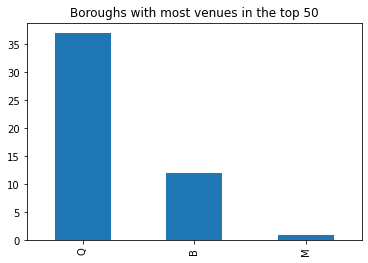

In [101]:
# drop city, state, metro, county, size_rank columns
# venu  = venu.drop(['id', 'latitude', 'longitude'], axis=1) 
#remove square brackets from start and end of borough column
venu['borough'] = venu['borough'].str[0]
venu
#find which boroughs have the most venues
venu['borough'].value_counts().plot(kind='bar').set_title('Boroughs with most venues in the top 50') 

Text(0.5, 1.0, 'Mean price of airbnbs in each borough')

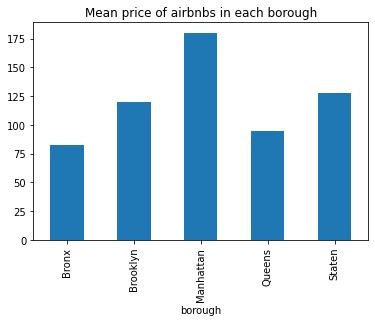

In [113]:
listsClone = lists.copy()
listsClone = listsClone[listsClone['zipcode'].notna()]
listsClone['zipcode']  = pd.to_numeric(listsClone['zipcode'] , errors='coerce')
listsClone['zipcode']  = listsClone['zipcode'].astype('int', errors='ignore')
listsClone['borough'] = listsClone['zipcode'].map(zipdict)
listsClone.dropna(subset = ['borough'], inplace=True)
listsClone['borough'] = listsClone['borough'].str[0]
listsClone.head(5)
#Mean price of airbnbs in each borough 
listsClone.groupby('borough')['price'].mean().plot(kind='bar').set_title('Mean price of airbnbs in each borough')
#Mean rating of airbnbs in each borough  

Text(0.5, 1.0, 'Mean rating of airbnbs in each borough')

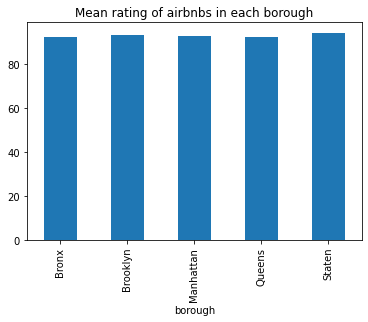

In [111]:
listsClone.groupby('borough')['review_scores_rating'].mean().plot(kind='bar').set_title('Mean rating of airbnbs in each borough')

### Exercise 2: (5 min)

Creating basic average graphs

Text(0.5, 1.0, 'Mean Household Income per borough')

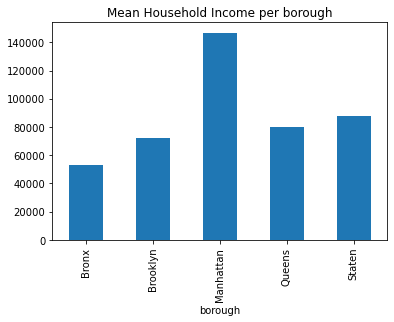

In [82]:
democlean['mean_household_income']  = pd.to_numeric(democlean['mean_household_income'] , errors='coerce')
d = democlean.groupby(['borough']).mean()
d = d.drop(['20-24_years', '5_years_or_less', '5-9_years','10-14_years','15-19_years','25-34_years','35-44_years','45-54_years'], axis=1) 
d = d.drop(['55-59_years', '60-64_years', '65-74_years','75-84_years','85_years_or_more','zipcode','$9,999_or_less',], axis=1) 
d['mean_household_income'].plot(kind="bar").set_title('Mean Household Income per borough')


Text(0.5, 1.0, 'Mean Household amount per borough')

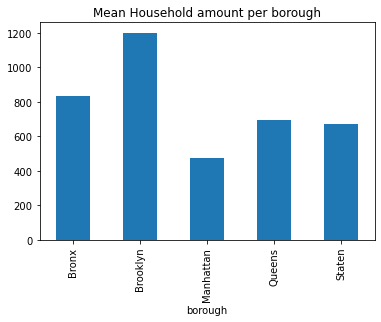

In [83]:
d['households'].plot(kind="bar").set_title("Mean Household amount per borough")

Text(0.5, 1.0, 'Manhattan Age Demographic Pie Chart')

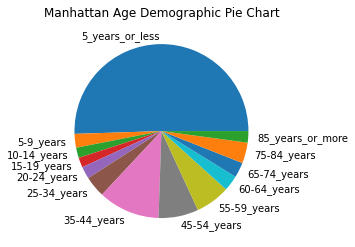

In [84]:
#democlean["totalPopulation"] = democlean.iloc[:,1:14].sum(axis=1)

manhattan_demo = democlean[democlean["borough"] == "Manhattan"].reset_index().drop(["index"], axis = 1)
brooklyn_demo = democlean[democlean["borough"] == "Brooklyn"].reset_index().drop(["index"], axis = 1)
staten_demo = democlean[democlean["borough"] == "Staten"].reset_index().drop(["index"], axis = 1)
bronx_demo = democlean[democlean["borough"] == "Bronx"].reset_index().drop(["index"], axis = 1)
queens_demo = democlean[democlean["borough"] == "Queens"].reset_index().drop(["index"], axis = 1)

manhattan_demo_age = manhattan_demo.drop(manhattan_demo.iloc[:,14:27], axis = 1).drop(["zipcode"], axis = 1).sum()
brooklyn_demo_age = brooklyn_demo.drop(brooklyn_demo.iloc[:,14:27], axis = 1).drop(["zipcode"], axis = 1).sum()
staten_demo_age = staten_demo.drop(staten_demo.iloc[:,14:27], axis = 1).drop(["zipcode"], axis = 1).sum()
bronx_demo_age = bronx_demo.drop(bronx_demo.iloc[:,14:27], axis = 1).drop(["zipcode"], axis = 1).sum()
queens_demo_age = queens_demo.drop(queens_demo.iloc[:,14:27], axis = 1).drop(["zipcode"], axis = 1).sum()

manhattan_demo_income = manhattan_demo.iloc[:,14:26].dropna()
brooklyn_demo_income = brooklyn_demo.iloc[:,14:26].dropna()
staten_demo_income = staten_demo.iloc[:,14:26].dropna()
bronx_demo_income = bronx_demo.iloc[:,14:26].dropna()
queens_demo_income = queens_demo.iloc[:,14:26].dropna()

manhattan_demo_age.plot(kind='pie',ylabel='').set_title('Manhattan Age Demographic Pie Chart')

Text(0.5, 1.0, 'Brooklyn Age Demograhpic Pie Chart')

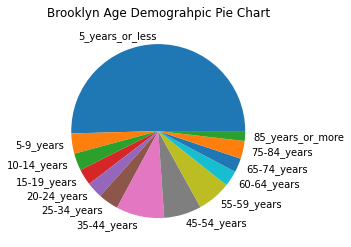

In [85]:
brooklyn_demo_age.plot(kind='pie',ylabel='').set_title('Brooklyn Age Demograhpic Pie Chart') 

Text(0.5, 1.0, 'Bronx Age Demographic Pie Chart')

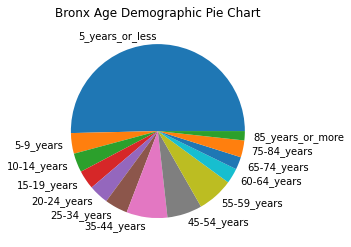

In [86]:
bronx_demo_age.plot(kind='pie',ylabel='').set_title("Bronx Age Demographic Pie Chart")

Text(0.5, 1.0, 'Queens Age Demographic Pie Chart')

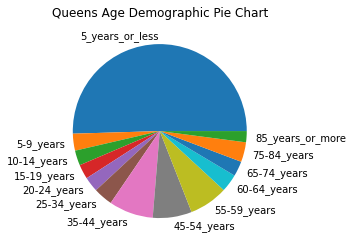

In [87]:
queens_demo_age.plot(kind='pie',ylabel='').set_title("Queens Age Demographic Pie Chart")

Text(0.5, 1.0, 'Staten Island Age Demographic Pie Chart')

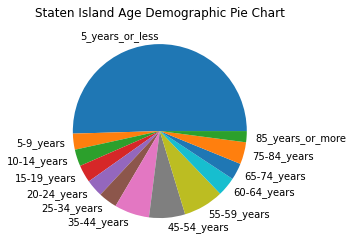

In [88]:
staten_demo_age.plot(kind='pie',ylabel='').set_title("Staten Island Age Demographic Pie Chart")

In [89]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sklearn.metrics       as Metrics
import pandas                as pd
import matplotlib.pyplot     as plt


import folium  #needed for interactive map
from folium.plugins import HeatMap

from   collections           import Counter
from   sklearn               import preprocessing
from   datetime              import datetime
from   collections           import Counter
from   math                  import exp
from   sklearn.linear_model  import LinearRegression as LinReg
from   sklearn.metrics       import mean_absolute_error
from   sklearn.metrics       import median_absolute_error
from   sklearn.metrics       import r2_score

In [90]:
d2 = democlean.copy()
d2 = d2.filter(["zipcode","median_household_income","mean_household_income"], axis=1)
d2 = d2.dropna()
d2 = d2.head(5)

In [91]:
folium_hmap = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="OpenStreetMap")

hm_wide = HeatMap( list(zip(d2['zipcode'], d2['mean_household_income'])),
                   min_opacity=0.2,
                   radius=8, blur=6, 
                   max_zoom=15, 
                 )

folium_hmap.add_child(hm_wide)

In [92]:
venues2 = venues.copy()
venues2 = venues2.filter(["latitude","longitude","rating"], axis=1)
venues2 = venues2.dropna(subset=['rating'])
venues2

folium_hmap = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="OpenStreetMap")

hm_wide = HeatMap( list(zip(venues2['latitude'], venues2['longitude'], venues2['rating'])),
                   min_opacity=0.2,
                   radius=8, blur=6, 
                   max_zoom=15, 
                 )

folium_hmap.add_child(hm_wide)
#Venues heatmap

In [93]:
listMap = pd.read_csv('listings.csv')
listMap = listMap[listMap.state == 'NY']
listMap[listMap.columns[~listMap.isnull().any()]]
listMap = listMap[listMap.metropolitan == 'NYC']
listMap[listMap.columns[~listMap.isnull().any()]]
listMap = listMap.filter(["latitude","longitude","review_scores_value"], axis=1)
listMap = listMap.dropna(subset=['review_scores_value'])
folium_hmap = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="OpenStreetMap")

hm_wide = HeatMap( list(zip(listMap['latitude'], listMap['longitude'], listMap['review_scores_value'])),
                   min_opacity=0.2,
                   radius=8, blur=6, 
                   max_zoom=15, 
                 )

folium_hmap.add_child(hm_wide)
#Listing heatmap review scores

In [94]:
listMap = pd.read_csv('listings.csv')
listMap = listMap[listMap.state == 'NY']
listMap[listMap.columns[~listMap.isnull().any()]]
listMap = listMap[listMap.metropolitan == 'NYC']
listMap[listMap.columns[~listMap.isnull().any()]]
listMap = listMap.filter(["latitude","longitude","price"], axis=1)
listMap = listMap.dropna(subset=['price'])
folium_hmap = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="OpenStreetMap")

hm_wide = HeatMap( list(zip(listMap['latitude'], listMap['longitude'], listMap['price'])),
                   min_opacity=0.2,
                   radius=8, blur=6, 
                   max_zoom=15, 
                 )

folium_hmap.add_child(hm_wide)
#Listing heatmap pricing